# Sentiment Analysis for Yelp Reviews

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')  

### EDA

In [2]:
df=pd.read_excel("Yelp_Dataset.xlsx")

In [3]:
df.head()

,Reviews,Stars
0,"OK, it's getting to the point where every time...",5
1,"Waited in a line so long, I thought I was at a...",5
2,Katz's is an institution for a reason. Absolut...,5
3,Katz's never ever disappoints! Don't let the l...,5
4,I felt like a tourist in here. But that's OK....,5


In [4]:
df.tail()

,Reviews,Stars
13233,TWO WORDS: TOURIST TRAP. This place is way o...,1
13234,"I will start off by saying horrible, horrible,...",1
13235,Hadn't been to Katz's in about 10 years. Was i...,1
13236,unbelievable 15.75 for a sandwich visitors don...,1
13237,Where do I begin? My mother and I were visitin...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13238 entries, 0 to 13237
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  13238 non-null  object
 1   Stars    13238 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 207.0+ KB


In [6]:
df.isnull().sum() #We examine the empty lines.

Reviews    0
Stars      0
dtype: int64

### Feature Engineering

In [7]:
df["Reviews"]=df["Reviews"].str.lower() #We convert our texts to lowercase.
df["Reviews"]=df["Reviews"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.
df["Reviews"]=df["Reviews"].str.replace("\d+","") #We are removing numbers from our texts.
df["Reviews"]=df["Reviews"].str.replace("\n","").replace("\r","") #We remove spaces in our texts.

In [8]:
def detect_sentiment(Reviews):
    return TextBlob(Reviews).sentiment.polarity
#We are doing our sentiment analysis.

In [9]:
df["Sentiment"]=df["Reviews"].apply(detect_sentiment)
df.head()

,Reviews,Stars,Sentiment
0,ok its getting to the point where every time i...,5,0.503636
1,waited in a line so long i thought i was at a ...,5,0.179167
2,katzs is an institution for a reason absolutel...,5,0.177500
3,katzs never ever disappoints dont let the line...,5,0.338528
4,i felt like a tourist in here but thats ok i...,5,0.385124


In [10]:
df["Sentiment"].value_counts()

 0.500000    195
 0.000000    173
 1.000000    116
 0.250000     86
 0.300000     79
            ... 
 0.316667      1
 0.050630      1
 0.175737      1
 0.191818      1
-0.061869      1
Name: Sentiment, Length: 8309, dtype: int64

In [11]:
df=df[df["Sentiment"]!=0]
df.shape

(13065, 3)

In [12]:
def sentiment2(sent):
    if (sent< 0):
        return 0
    elif sent>0:
        return 1
#We divide the texts into positive and negative..

In [13]:
df["Sent"]=df["Sentiment"].apply(sentiment2)
df.reset_index()
df.head()

,Reviews,Stars,Sentiment,Sent
0,ok its getting to the point where every time i...,5,0.503636,1
1,waited in a line so long i thought i was at a ...,5,0.179167,1
2,katzs is an institution for a reason absolutel...,5,0.177500,1
3,katzs never ever disappoints dont let the line...,5,0.338528,1
4,i felt like a tourist in here but thats ok i...,5,0.385124,1


In [14]:
def neutral(Stars):
    if Stars<=3:
        return 0
    elif Stars>3:
        return 1

In [15]:
df["Neutral"]=df["Stars"].apply(neutral)
df.head()

,Reviews,Stars,Sentiment,Sent,Neutral
0,ok its getting to the point where every time i...,5,0.503636,1,1
1,waited in a line so long i thought i was at a ...,5,0.179167,1,1
2,katzs is an institution for a reason absolutel...,5,0.177500,1,1
3,katzs never ever disappoints dont let the line...,5,0.338528,1,1
4,i felt like a tourist in here but thats ok i...,5,0.385124,1,1


### Data Visualization

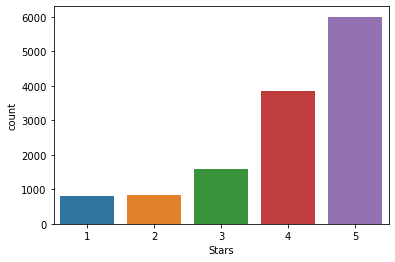

In [16]:
sns.countplot(df.Stars);

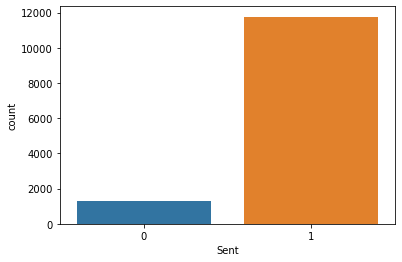

In [17]:
sns.countplot(df.Sent);

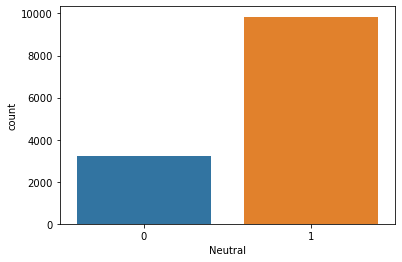

In [18]:
sns.countplot(df.Neutral);

### Classification

In [19]:
vect=CountVectorizer(lowercase=True,stop_words="english") #We delete unnecessary words and tokenize the texts.
x=df.Reviews
y=df.Neutral
x=vect.fit_transform(x)

In [20]:
def sentiment_classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    r=RandomForestClassifier()
    l=LogisticRegression()
    mb=MultinomialNB()
    
    algos=[k,d,r,l,mb]
    algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','MultinomialNB']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    sentiment_classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [21]:
sentiment_classification_funct(x,y)

(10452, 28106) (2613, 28106) (10452,) (2613,)


,f1_score,recall_score,precision_score,accuracy_score
LogisticRegression,0.917308,0.936138,0.899221,0.872560
MultinomialNB,0.912051,0.951343,0.875875,0.861462
RandomForestClassifier,0.897218,0.988849,0.821128,0.828932
KNeighborsClassifier,0.858943,0.967562,0.772249,0.760046
DecisionTreeClassifier,0.846231,0.853523,0.839063,0.765786


In [22]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x=df.Reviews
y=df.Sent
x=vect.fit_transform(x)

In [23]:
sentiment_classification_funct(x,y)

(10452, 28106) (2613, 28106) (10452,) (2613,)


,f1_score,recall_score,precision_score,accuracy_score
LogisticRegression,0.968150,0.977428,0.959047,0.942212
RandomForestClassifier,0.951165,0.999574,0.907228,0.907769
KNeighborsClassifier,0.945749,0.994889,0.901235,0.897436
MultinomialNB,0.943443,0.980409,0.909163,0.894374
DecisionTreeClassifier,0.940805,0.951022,0.930805,0.892461


In [24]:
df.to_excel("Yelp_Dataset(edited).xlsx",index=False)